# A Tutorial for AdaBoost

## Intall the libraries

First, let's install the libraries needed for this tutorial. We will need numpy, pandas, sklearn, matplotlib, graphviz, pydotplus. You can install these libraries using the terminal command through `pip`, for example:

    $ pip3 install numpy

Make sure you are able to run the following code before proceeding.

In [1]:
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn import tree
import pandas as pd
import numpy as np
import math
import graphviz, pydotplus
from sklearn.model_selection import train_test_split
from sklearn import metrics
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import normalize

## Introduction
In this tutorial, we will be introducing to you the AdaBoost algorithm. 
Since **AdaBoost** is a specific algorithm in the family of **Boosting** algorithm, let's first introduce boosting.

## Boosting


  * ### Definition:
  
   **Boosting** is a family of machine learning algorithm that transforms weak learners to a strong learner (Wikipedia). **Weak learners** are defined as classifers that does just a bit better than random guessing, whereas **strong learners** are defined as classifers that produce outcomes that are well-correlated to the actual classfication.

* ### Intuition

    Let's think about this intuitively. Imagine yourself in grade school learning about elementary math. It is common for you to make many mistakes at the beginning, but after you make a mistake, you **learn** from this mistake, and gradually, you get better because you **learned from you previous failures**.
<img src="https://sensiblechinese.com/wp-content/uploads/2015/03/asic_equation-copy.png">



## Why Boosting? Why AdaBoost?

* **Boosting algorithms** are one of the most widely used algorithm in **data science competitions**. Boosting algorithms are used to **improve the performances of classifiers**.
* **AdaBoost** is the first successful boosting algorithm designed for binary classification, and it is the first realization of boosting that saw great success in application.(https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/). 
* **AdaBoost** is also the basis of many more complex boosting algorithm. Thus, getting a good grasp of the AdaBoost algorithm can prepare you for future learning of more boosting algorithm. It is also widely used in **image classfication**.

## AdaBoost
* * ### Definition:

    **AdaBoost** refers to **Adaptive Boosting**. The main idea behind AdaBoost is combining a set of weak classifers to form a strong classifer. Specifically, the default weak classifiers in AdaBoost are decision trees with one split, which is also known as **decision stumps**. See the below code for an example illustration of **decision trees** and **decision stumps**.

### Decision Trees

Let's use the iris dataset as an example. Run the following code to get an idea of the features of the iris dataset, these are the things that we are going to use in order to classify which target group a specific example is. 

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


We split the datasets into training set and testing set. We set a random state so that every time we run this code, we will get the same result down below.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.5, random_state = 388)
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)

In [4]:
dot_data = tree.export_graphviz(dtree, filled = True, 
                                rounded = True, 
                                special_characters = True,
                                feature_names = iris.feature_names)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("iris_decision_tree.png")

True

Now you should be able to have a picture visualizing the decision tree classifer in the same folder as this notebook.
The **pental width (cm) <= x** describes how the samples are being split up by.
**Gini** refers to gini index. **Samples** refer to the number of samples.
**Value** is how the samples are split up. i.e. In the first case, the 75 samples are split into 21 in category 1, 29 in category 2, and 25 in category 3.

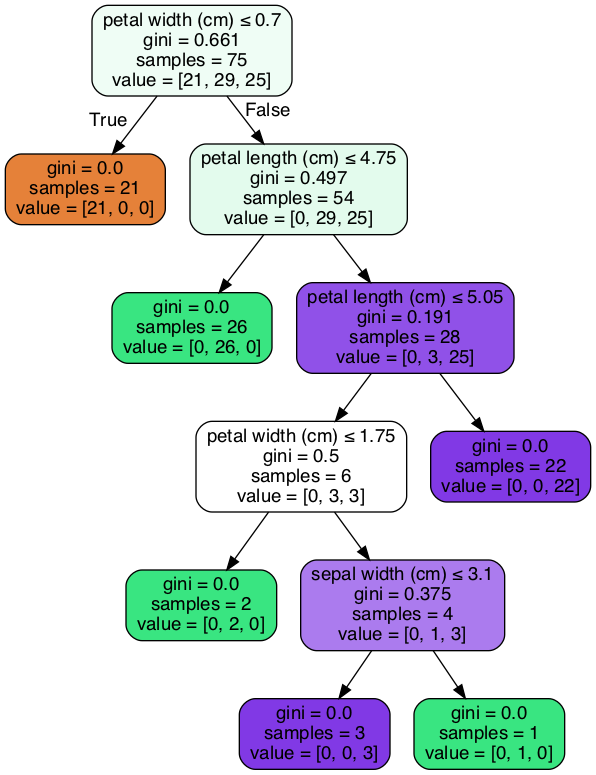

In [5]:
Image('iris_decision_tree.png')

In [6]:
print(dtree.tree_.max_depth)

5


Note that for this decision tree `dtree`, the depth is 5, that means the length of the longest path from a root to a leaf is 5.

Let's test its accuracy!

In [7]:
y_prediction = dtree.predict(X_test)
metrics.accuracy_score(y_test, y_prediction)

0.96

We have an accuracy of around 93.33%, which is pretty good!

### Decision Stump
A **Decision Stump** is simply a decision tree with depth = 1.

In [8]:
dstump = tree.DecisionTreeClassifier(max_depth=1)
dstump.fit(X_train, y_train)
dot_data_stump = tree.export_graphviz(dstump, 
                                      filled = True, 
                                      rounded = True, 
                                      special_characters = True,
                                      feature_names = iris.feature_names)
graph_stump = pydotplus.graph_from_dot_data(dot_data_stump)
graph_stump.write_png("iris_decision_stump.png")

True

Now we have the following visualization for the decision stump classifer for iris (in the same folder as this notebook).

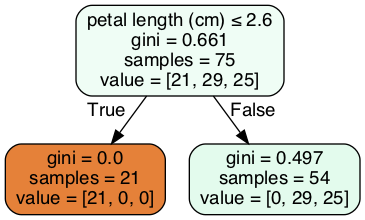

In [9]:
Image('iris_decision_stump.png')

In [10]:
y_prediction_stump = dstump.predict(X_test)
metrics.accuracy_score(y_test, y_prediction_stump)

0.6666666666666666

We can see that due to the restriction of the depth=1, the decision trump performed a lot worse than the depth=5 decision tree. So this is an example of a **weak learner** we mentioned earlier.

## AdaBoost

The algorithm for AdaBoost is as follows:
1. We first assign an initial weight to every data point, the initial weight is 1/N, where N is the number of features.<br>
    $w_i = \frac{1}{N} $
2. For iterations 1, 2, 3, ..., M:
    * Pick the weak classifier (e.g. A decision stump) for a certain feature which performs the best out of all the weak classifiers (i.e. pick the weak classifer with has the lowest weighted classification error).<br>
    $ err_m = E_{w_m}[1_{y \neq f(x)}] $
    * Compute the estimator coefficient $ \theta_m $(L = learning rate) <br>
    $ \theta_m = L\ln {(\frac{1-err_m}{err_m})}$
    * Update the data weights, {Z_m} is the normalization function so that all data points sum to 1. <br>
    $ w_{m+1} = \frac{w_m  *  e ^ {\theta_m}}{Z_m}$
3. We get the final prediction from summing all the classifiers' weighted predictions.

The math might be a bit intimidating, but the general intuition is as follows: <br>
    If my first weak classifer made some **mistakes** over some data points <br>
    => then I am going to emphasize the importance of these data points by **increasing their data weights** <br>
    => so that it **matters more** to the next weak classifier.

### A step-by-step Simple Example 

Let's go through a simple example by step to see how Adaboost changes the weights for the data points at each step (this is inspired by other online tutorials - see reference list at the end).

Let's first create a small dataset, our goal is to predict the `Result` column from the `x` and `y` column.
The `weights` column shows the current weight for each data point.

In [11]:
data_small = [
[1, 10, 1],
[2, 3, 0],
[3, 7, 1],
[3, 4, 0],
[1, 1, 1],
[10, 4, 0],
[8, 10, 1],
[8, 1, 1]
]
w = 1/len(data_small)
df_small = pd.DataFrame(columns=["x", "y", "Result"], data = data_small)
df_small["weights"] = w
df_small

,x,y,Result,weights
0,1,10,1,0.125
1,2,3,0,0.125
2,3,7,1,0.125
3,3,4,0,0.125
4,1,1,1,0.125
5,10,4,0,0.125
6,8,10,1,0.125
7,8,1,1,0.125


In [12]:
# true_small is the subset of the data with `Result` = 1.
# false_small is the subset of the data with `Result` = 0.
true_small = df_small[df_small["Result"] == 1]
false_small = df_small[df_small["Result"] == 0]

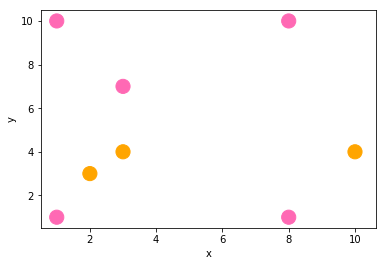

In [13]:
# setting an initial coefficients just for the purpose of plotting data points with appropriate sizes
initial_w_coeff = 200/w 
plt.scatter(true_small["x"], true_small["y"], marker = "o", s = initial_w_coeff*true_small["weights"], c = "hotpink")
plt.scatter(false_small["x"], false_small["y"], marker = "o", s = initial_w_coeff*false_small["weights"], c = "orange")
plt.xlabel("x") 
plt.ylabel("y")
plt.show()

### Note: 
* The **size** in the above graph indicates the **weights** for the data points. At the start, the weights for all the data points are he same, so all datasets have the same size.
* The **pink** datapoints are the ones such that `Result` = 1.
* The **orange** datapoints are the ones such that `Result` = 0.

In [14]:
# separate the feature columns from the target column
data_features = df_small.values[:,:-2]
data_target = df_small.values[:, -2]
print(data_features)
print(data_target)

[[ 1. 10.]
 [ 2.  3.]
 [ 3.  7.]
 [ 3.  4.]
 [ 1.  1.]
 [10.  4.]
 [ 8. 10.]
 [ 8.  1.]]
[1. 0. 1. 0. 1. 0. 1. 1.]


In [15]:
# classifier for round 1
# here we use decision stumps (as we defined above) as our weak classifier
clf_r1 = tree.DecisionTreeClassifier(max_depth=1)
clf_r1.fit(data_features, data_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
y_predict_clf_r1 = clf_r1.predict(data_features)
print(y_predict_clf_r1)
print(data_target)
# https://stackoverflow.com/questions/50538626/plot-the-decision-surface-of-a-classification-decision-tree-with-3-features-on-a

[1. 0. 1. 0. 0. 0. 1. 0.]
[1. 0. 1. 0. 1. 0. 1. 1.]


In [17]:
# Plotting decision regions
# Citation: Ski-learn website (See references).
x_min, x_max = data_features[:, 0].min() - 1, data_features[:, 0].max() + 1
y_min, y_max = data_features[:, 1].min() - 1, data_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf_r1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

### Updating the weights

We first find the **data points** where we did the **wrong** classification. <br>
Then we obtain the **sum of weights** of the samples that we did the wrong classification.

In [18]:
incorrect = (y_predict_clf_r1 != data_target)
print(incorrect)
weights_list = list(df_small.loc[: , "weights"])
error_r1 = sum(weights_list[i] for i in range(len(weights_list)) if incorrect[i]==True)
print(error_r1)

[False False False False  True False False  True]
0.25


Then, we want to **emphasize** the data points where we did the **wrong** classification 
by giving them **higher weights**.

Recall our function for calculator the estimator coefficient and data weights.
* Compute the estimator coefficient $ \theta_m $(L = learning rate) <br>
$ \theta_m = L\ln {(\frac{1-err_m}{err_m})}$
* Update the data weights, {Z_m} is the normalization function so that all data points sum to 1. <br>
$ w_{m+1} = \frac{w_m  *  e ^ {\theta_m}}{Z_m}$ <br>

We set the learning rate `L` to be $0.5$. We know $err_m$ = `error_r1` (error rate for this round 1) froom our previous calculation. So the estimator coefficient is calculated as follows:

In [19]:
# theta for the first round
theta_r1 = 0.5 * math.log((1 - error_r1) / error_r1)
theta_r1

0.5493061443340549

Next, we update each data point's weights based on the theta.

In [20]:
print("Previous weights", weights_list)

Previous weights [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]


In [21]:
for i in range(len(weights_list)):
    if incorrect[i]:
        weights_list[i] *= math.exp(theta_r1)
    else:
        weights_list[i] *= math.exp(-theta_r1)
# normalize to the weights list so that all weights sum to 1.
weights_list /= np.sum(weights_list)
print("Current weights", weights_list)
print("Sum of current weights", sum(weights_list))

Current weights [0.08333333 0.08333333 0.08333333 0.08333333 0.25       0.08333333
 0.08333333 0.25      ]
Sum of current weights 1.0000000000000002


We can see that **previously**, all data points carry **same** weights. <br>
But now, the data points that we **misclassified** now have **more** weights than the correctly classified ones.

In [22]:
df_small["weights"] = weights_list
df_small

,x,y,Result,weights
0,1,10,1,0.083333
1,2,3,0,0.083333
2,3,7,1,0.083333
3,3,4,0,0.083333
4,1,1,1,0.250000
5,10,4,0,0.083333
6,8,10,1,0.083333
7,8,1,1,0.250000


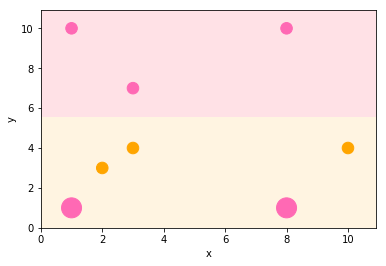

In [23]:
true_small = df_small[df_small["Result"] == 1]
false_small = df_small[df_small["Result"] == 0]
cmap = ListedColormap(["moccasin", "lightpink"])
plt.contourf(xx, yy, Z, alpha=0.4, cmap = cmap)
plt.scatter(true_small["x"], true_small["y"], marker = "o", s = initial_w_coeff*true_small["weights"], c = "hotpink")
plt.scatter(false_small["x"], false_small["y"], marker = "o", s = initial_w_coeff*false_small["weights"], c = "orange")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Note:
* Notice that in the above graph, the **background color** indicates the **prediction** made by our decision stump.
* The individual data points' **color** represent their **true** class.
* The **sizes** of the data points represent their **weights**. 
* There are **two** data points that our decision stump **misclassfied**, so they carry **more weights** than the other correctly classified ones.
* This is the intuition of **"learning from our mistakes"** mentioned previously in the tutorial.
* This concludes our first iteration. 

We repeat this process until we reach our iteration `M` or until all the data points have been perfectly classifed.

### Final Result

We apply the Adaboost classifier, setting the number of iteration, M, to be 5.

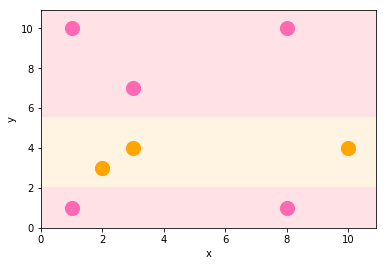

In [24]:
# Let's just do 5 iterations (M = 5) for this small dataset, so we set n_estimators = 5.
small_ada = AdaBoostClassifier(n_estimators = 5,
                               random_state = 0)
small_ada.fit(data_features, data_target)
cmap = ListedColormap(["moccasin", "lightpink"])
# Citation: documentation from ski-learn plotting.
plot_step = 0.1
x_min, x_max = data_features[:, 0].min() - 1, data_features[:, 0].max() + 1
y_min, y_max = data_features[:, 1].min() - 1, data_features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = small_ada.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, alpha = 0.4, cmap=cmap)
s_small = 200
plt.scatter(true_small["x"], true_small["y"], marker = "o", s = s_small, c = "hotpink")
plt.scatter(false_small["x"], false_small["y"], marker = "o", s = s_small, c = "orange")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Note:
* The **background color** indicates the **prediction** made by our decision stump.
* The individual data points' **color** represent their **true** class.
* In this final graph, we can see that the AdaBoost Classifer is able to classifer **all** the data points **correctly**.
* Note that in this graph, the size is set as the same for all datasets as we didn't do the calculations for all the data points
after 5 rounds.


## Real-World Application

Let's try AdaBoost on a dataset from Kaggle.
You can **download** it from https://www.kaggle.com/uciml/zoo-animal-classification/download <br>
After downloading it, unzip the 'zoo.csv' file so that it is in the same folder as this tutorial.
    We are trying to **predict the classification of the animals** `class_type` from the features given.

In [25]:
train_df = pd.read_csv("zoo.csv")
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


We see that `animal_name` cannot be converted to floats directly, so let's preprocess the data first by dropping this column.
I added in the conditional statement to avoid duplicate removal of columns.

In [26]:
if (pd.Series(['animal_name']).isin(train_df.columns).all()):
    train_df = train_df.drop(columns=["animal_name"])
train_df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [27]:
# train_target gives an array of the target value (class_type) that we are trying to predict.
train_target = train_df.values[:,-1]
train_features = train_df.values[:,:-1]
X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.3, random_state = 388)
# for example, we can print the following to see more clearly what target and feature stores.
print(train_df.values[0])
print(train_features[0])
print(train_target[0])
# we split the dataset into 70% training and 30% testing.
print(len(X_train), len(X_test))

[1 0 0 1 0 0 1 1 1 1 0 0 4 0 0 1 1]
[1 0 0 1 0 0 1 1 1 1 0 0 4 0 0 1]
1
70 31


In [28]:
clf = AdaBoostClassifier(n_estimators = 500,
                     algorithm="SAMME", 
                     random_state = 0)
clf = clf.fit(X_train, y_train)

In [29]:
y_prediction = clf.predict(X_test)
metrics.accuracy_score(y_test, y_prediction)

0.8709677419354839

We see that using `AdaBoostClassifier`, we reach an accuracy score of 87.1% when classifying this dataset.

In [30]:
# the first line is the true classification of the test points
print((y_test))
# the second line is our prediction of the test points
print(y_prediction)

[5 7 3 3 7 1 1 6 1 1 1 7 7 1 1 2 7 2 1 7 2 6 2 6 1 1 1 3 1 1 2]
[5 7 5 5 6 1 1 6 1 1 1 7 7 1 1 2 7 2 1 7 2 6 2 6 1 1 1 5 1 1 2]


In [31]:
clf1 = AdaBoostClassifier(RandomForestClassifier(n_estimators = 1000),
                         algorithm="SAMME", n_estimators=500,
                         random_state = 0)

clf1 = clf1.fit(X_train, y_train)

In [32]:
y_prediction1 = clf1.predict(X_test)
metrics.accuracy_score(y_test, y_prediction1)

0.9032258064516129

We also see that using `RandomForestClassifier` instead of the default `DecisionTreeClassifier(max_depth=1)` raised the accuracy score by roughly 3%, giving us a total accuracy of 90.3%.

## Comparison with Other common classifiers

### Multinomial Logistic Regression

In [33]:
LogReg = LogisticRegression(solver = 'lbfgs', multi_class='multinomial', max_iter = 200)
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
y_pred_log = LogReg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_log))

0.8387096774193549


The multinomial logistic regression gives us an accuracy of 83.9% when applied on the same training and testing set.  

### Support Vector Classification

In [35]:
svc = SVC(decision_function_shape="ovr", gamma="auto")
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
y_pred_svc = svc.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_svc))

0.7096774193548387


The SVC gives us an accuracy of 70.9% when applied on the same training and testing set.  

We can see that the `AdaBoostClassifier` outperforms both `LogisticRegression` and `SVC` on this dataset.

Thanks for reading! Hopefully you will be able to know a bit more about AdaBoost after reading this tutorial. :D

## Resources for Further Readings
* Here're some math behind AdaBoost! <br>
https://towardsdatascience.com/boosting-algorithm-adaboost-b6737a9ee60c
* A detailed paper about AdaBoost. <br>
http://rob.schapire.net/papers/explaining-adaboost.pdf
* A really informative resource if you want to learn more about other boosting algorithms! <br>
https://medium.com/syncedreview/tree-boosting-with-xgboost-why-does-xgboost-win-every-machine-learning-competition-ca8034c0b283
* Some arguments on boosting algorithm and overfitting. <br>
https://www.quora.com/Why-is-the-boosting-algorithm-robust-to-overfitting <br>
https://stats.stackexchange.com/questions/20622/is-adaboost-less-or-more-prone-to-overfitting

## References
* https://en.wikipedia.org/wiki/Boosting_(machine_learning)
* http://rob.schapire.net/papers/explaining-adaboost.pdf
* https://towardsdatascience.com/understanding-adaboost-2f94f22d5bfe
* https://towardsdatascience.com/boosting-algorithm-adaboost-b6737a9ee60c
* https://www.youtube.com/watch?v=-DUxtdeCiB4
* https://sefiks.com/2018/11/02/a-step-by-step-adaboost-example/
* https://cole-maclean.github.io/blog/Adaboost-Predicting-Churn/
* https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py